In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/mariolpantunes/ml101/main/datasets/housing.csv')

In [3]:
data = pd.get_dummies(data)

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop(['SalePrice'], axis=1), 
                                                    data.SalePrice, test_size=0.3, 
                                                    random_state=0)

In [5]:
data.isnull().sum()

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 218, dtype: int64

# Trying Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

# create the random forest with your hyperparameters.
model = RandomForestClassifier(n_estimators=340)

# fit the model to start training.
model.fit(x_train, y_train)

# get the importance of the resulting features.
importances = model.feature_importances_

# create a data frame for visualization.
final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
final_df.set_index('Importances')


,Features
Importances,
0.035428,Id
0.012943,MSSubClass
0.028217,LotFrontage
0.033759,LotArea
0.017663,OverallQual
...,...
0.000415,SaleCondition_AdjLand
0.000690,SaleCondition_Alloca
0.001284,SaleCondition_Family


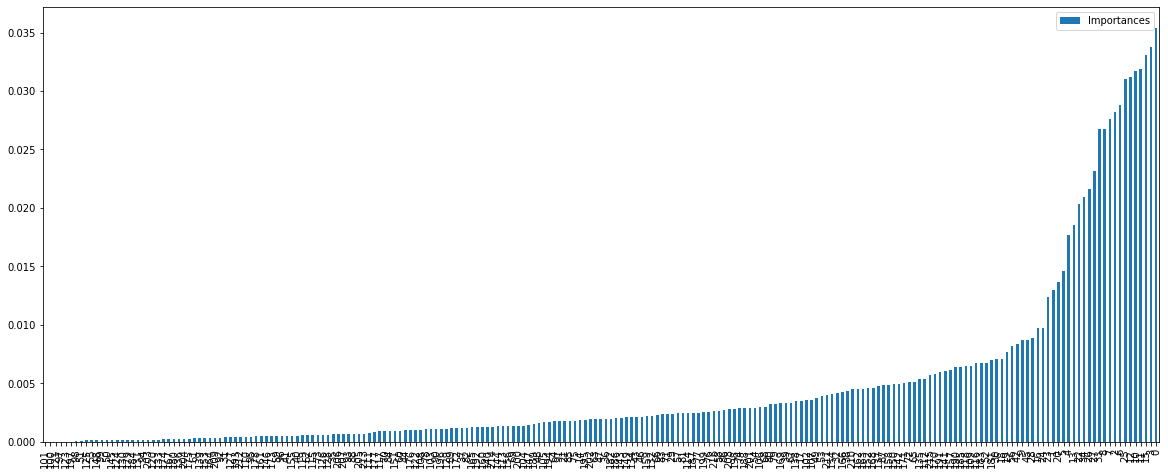

In [7]:
# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances')

# plot the feature importances in bars.
final_df.plot.bar(figsize = (20,8)) 

# Lasso

In [8]:
# Lasso for Regression tasks, and Logistic Regression for Classification tasks.
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel

# using logistic regression with penalty l1.
selection = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
selection.fit(x_train, y_train)

ValueError: ignored

In [ ]:
# see the selected features.
selected_features = x_train.columns[(selection.get_support())]

# see the deleted features.
removed_features = x_train.columns[(selection.estimator_.coef_ == 0).ravel().tolist()]

In [ ]:
print(selected_features)

In [ ]:
print(removed_features)